# House Pricing

In [1]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

import math

import warnings
warnings.filterwarnings("ignore")

## Reading and understanding the Data

In [2]:
df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking the shape of the dataframe
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Checking the percentage of misisng values in each column
round(100*df.isnull().sum()/len(df),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

*The variables having missing values will be treated after Visualization*

## EDA

### Univariate Analysis

In [7]:
# Definning a function to plot barchart
import math
def func_bar(*args,data_df):                        
    m=math.ceil(len(args)/2)  # getting the length of arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 6*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        sns.countplot(x=col, data=data_df,ax=ax_li[i], order = data_df[col].value_counts().index)
        ax_li[i].set_title(col)
        ax_li[i].set_yscale('log')
        plt.tight_layout()
        i=i+1

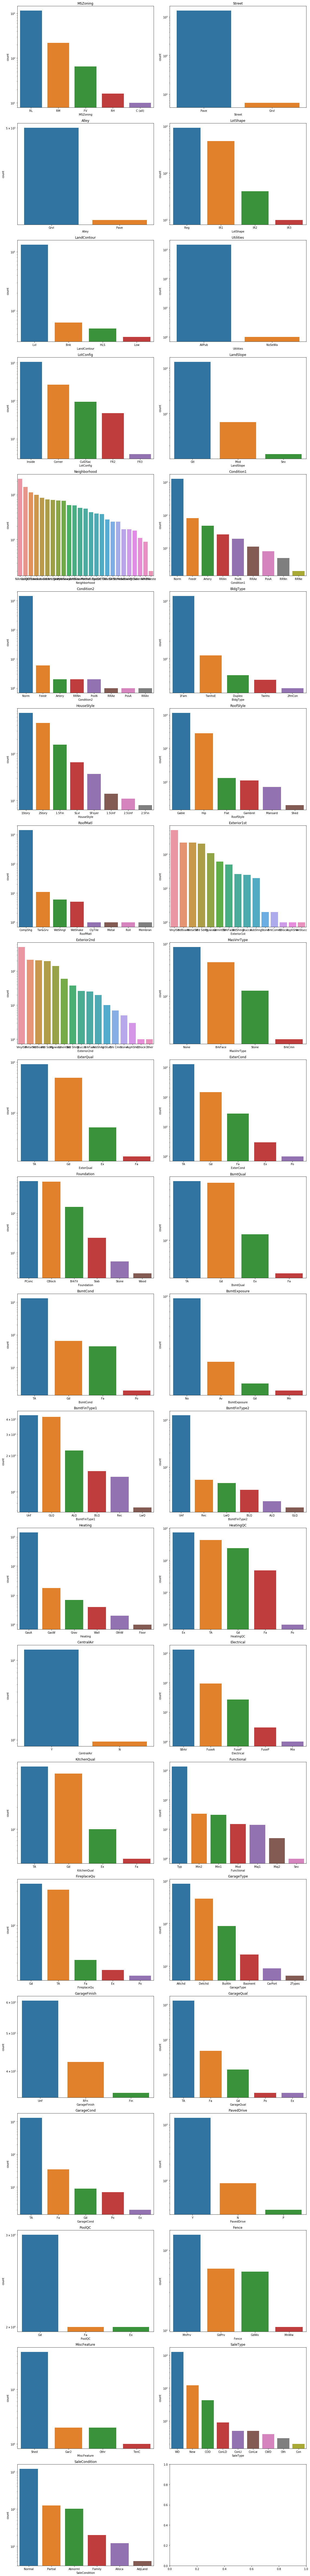

In [8]:
cat_list=df.select_dtypes('object').columns.tolist()  # creating a lsit of categorical columns
func_bar(*cat_list,data_df=df)   # plotting the caregorical variables

#### Handling missing  values

Comparing the above results with the data dictionary reveals that most of the variables in which a particular feature is not present are represented as NaN. So they are imputed with the value 'NA' as given in data dictionary

In [9]:
# Filling nan values
def na_fill(*args,data):
    for col in args:
        data[col]=data[col].fillna('NA')

In [10]:
col_fillna=['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','GarageType',
            'GarageFinish', 'GarageQual', 'GarageCond','FireplaceQu', 'Fence']
na_fill(*col_fillna,data=df)

*Since the columns - Alley, MiscFeature and PoolQC have more than 90% missing values which are actually Not Available, imputing them will make them highly biased. So they are dropped before further analysis*

In [11]:
df.drop(['Alley','MiscFeature','PoolQC'],axis=1,inplace=True)
df.shape

(1460, 78)

#### Handling other variables

In [12]:
col=df.columns[df.isnull().any()].tolist()
df[col].isnull().sum()/len(df)

LotFrontage    0.177397
MasVnrType     0.005479
MasVnrArea     0.005479
Electrical     0.000685
GarageYrBlt    0.055479
dtype: float64

In [13]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
# Since both the mean and median are almost equal, the variable lot frontage is imputed with mean
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

*It is observed that date-time variables are represented as integers. So their datatype has to be changed*

In [15]:
# change year to date
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'],format='%Y').dt.year
df['YearRemodAdd']=pd.to_datetime(df['YearRemodAdd'],format='%Y').dt.year
df['GarageYrBlt']=pd.to_datetime(df['GarageYrBlt'],format='%Y',errors = 'coerce').dt.year
df['Selling_Time'] = pd.to_datetime(df['YrSold'].astype(str)  + df['MoSold'].astype(str),format='%Y%m').dt.year

In [16]:
# Derived parameters
import datetime as dt
current_year=dt.date.today().year
df['Age of Building']=current_year-df['YearBuilt']
df['Age of Garage']=current_year-df['GarageYrBlt']
df['Remodelled']=current_year-df['YearRemodAdd']
df['Years after selling']=current_year-df['Selling_Time']

In [17]:
#dropping original columns
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold','Selling_Time'],axis=1,inplace=True)

In [18]:
# Imputing missing values in Age of Garage column. The missing values are beacuse garage was not built at all
df['Age of Garage'].fillna(value=-1,inplace=True)  # impute missing value in Age of Garage with a negative value to indicate no garage

In [19]:
col=df.columns[df.isnull().any()].tolist()
df[col].isnull().sum()/len(df)

MasVnrType    0.005479
MasVnrArea    0.005479
Electrical    0.000685
dtype: float64

In [20]:
df['MasVnrType'].fillna(df['MasVnrType'].mode().iloc[0],inplace=True)
df['Electrical'].fillna(df['Electrical'].mode().iloc[0],inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [21]:
# Dropping rows having misisng values
#df.dropna(inplace=True)
#df.shape

#### Dropping highly biased columns

*From the bar chart, certain variables are found to be highly biased. They have to be dropped, if necessary, after further examination*

In [22]:
def uniq(*args,data):
    for col in args:
        print(data[col].value_counts())

In [23]:
col = ['Street','Utilities', 'CentralAir']
uniq(*col,data=df)

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64


*Since all the examined columns are found to be highly imbalanced (>90), they are dropped*

In [24]:
df.drop(col,axis=1,inplace=True)
df.shape

(1460, 74)

In [25]:
col_bx=['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
        'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','SalePrice','Age of Building',
         'Age of Garage','Remodelled']  # list of columns whose distribution is to be checked

In [26]:
num_list=df.select_dtypes(exclude=['object']).columns.tolist()  # creating a list of numeric columns

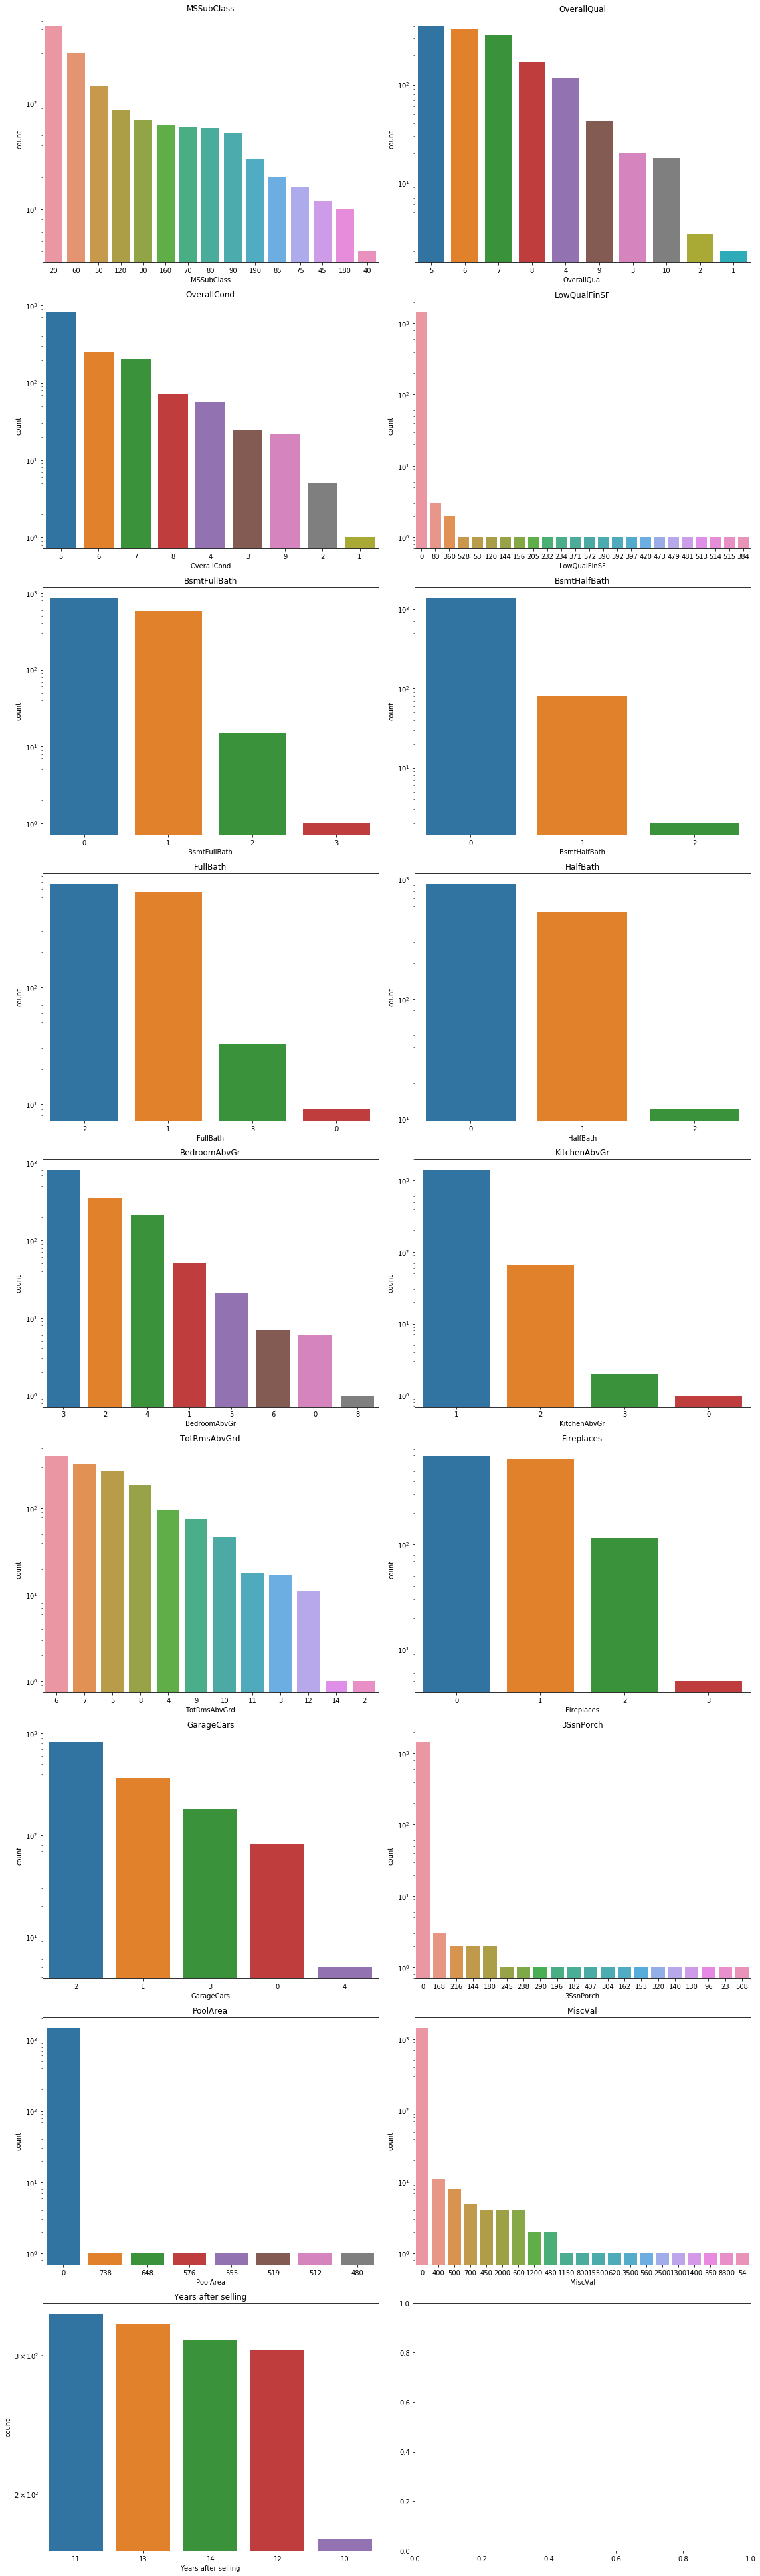

In [27]:
nl=[col for col in num_list if col not in col_bx] # list of columns to be plotted using bar chart
func_bar(*nl[1:],data_df=df)

#### Plotting the Distribution of Numeric Variables

In [28]:
#function for box plot
def bx_plot(*args,data): 
    
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 3*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        sns.boxplot(data[col],ax=ax_li[i])  # plotting the box plot
        ax_li[i].set_title(col)
        plt.tight_layout()
        i=i+1

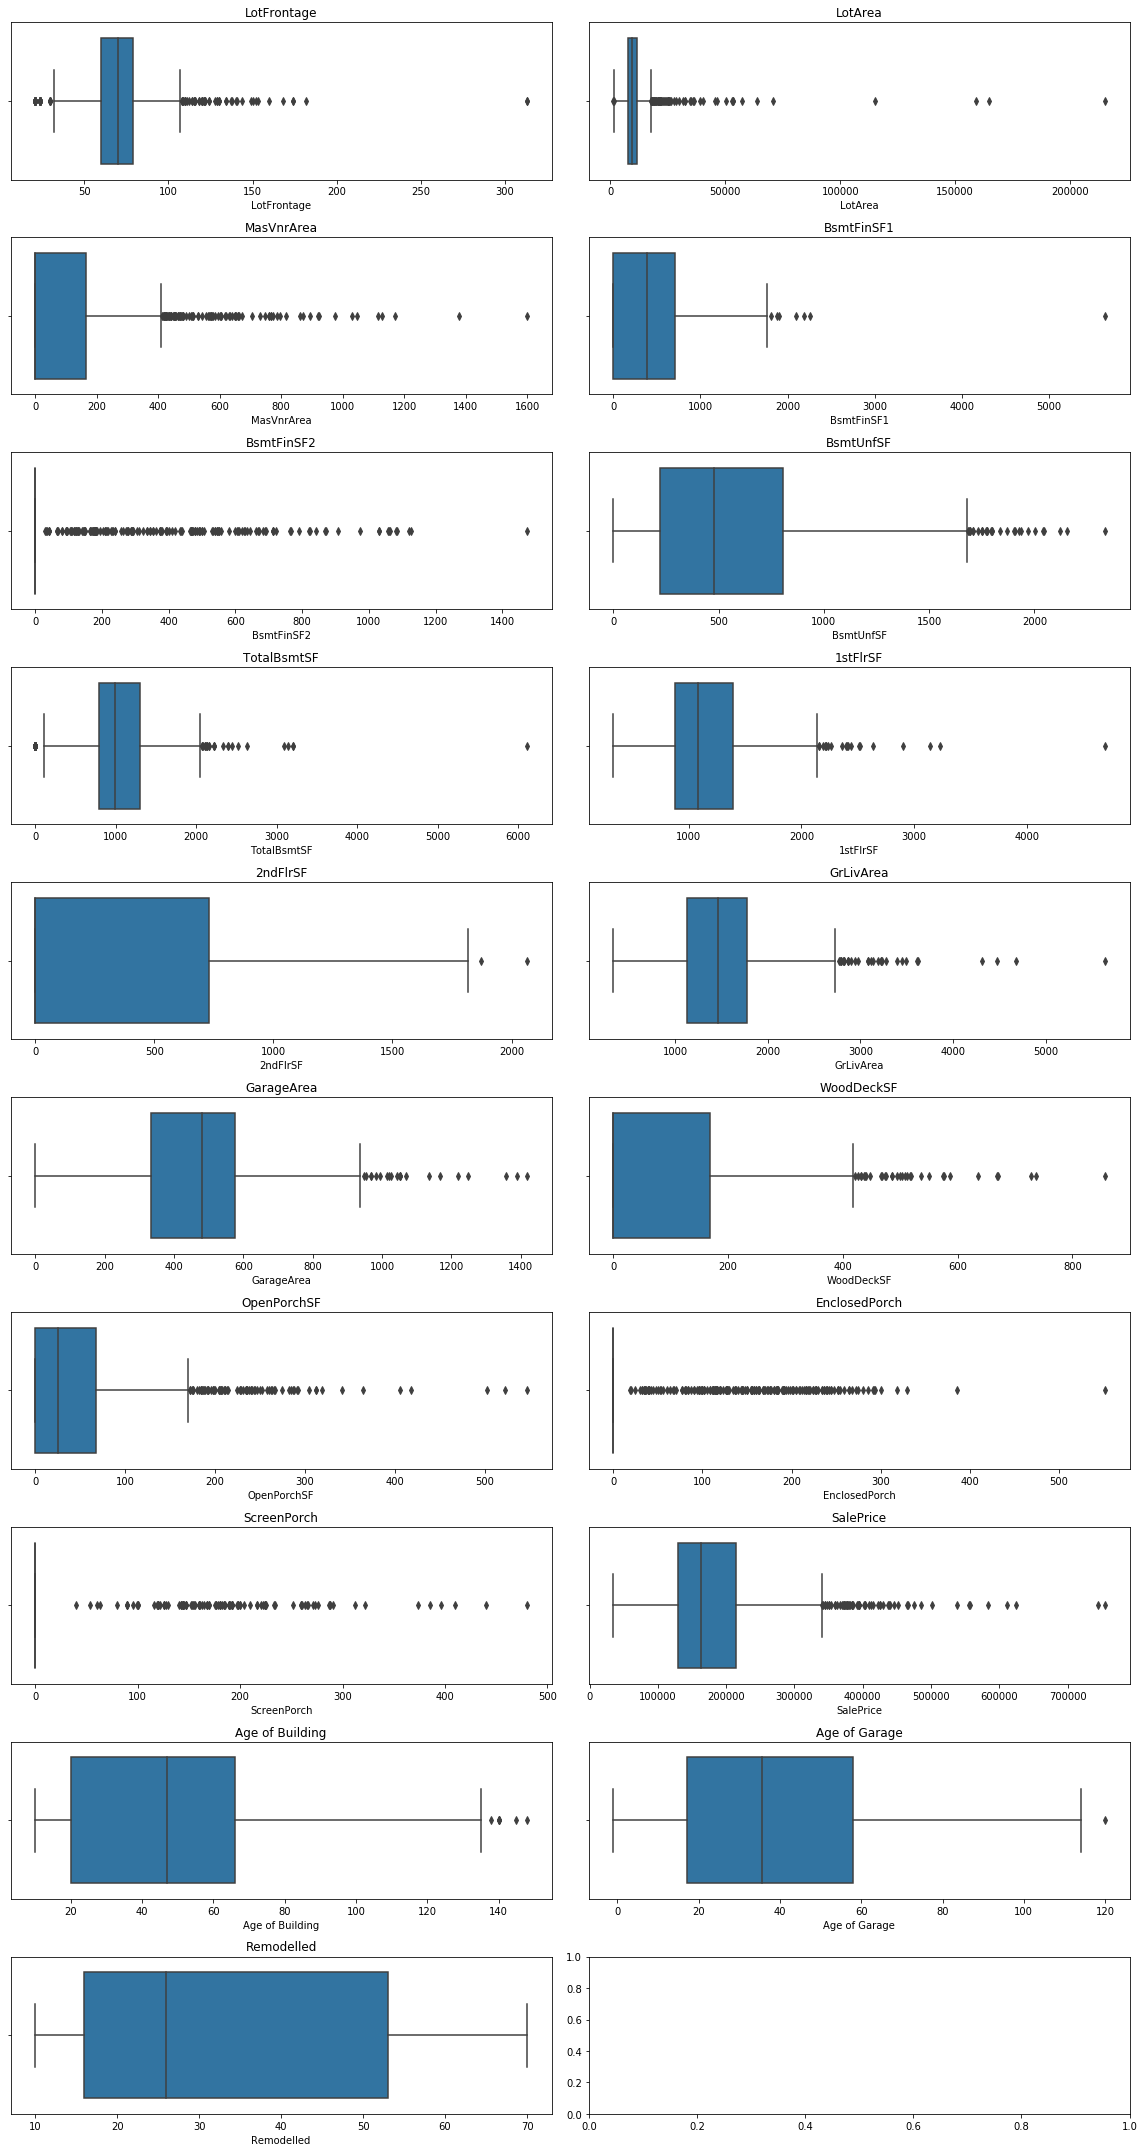

In [29]:
bx_plot(*col_bx,data=df)

*Columns having outliers are treated*

#### Outlier Treatment

In [30]:
# Outlier treatment is done only for specific numerical variables
q=df['LotFrontage'].quantile(0.999)
df=df[df['LotFrontage']<=q]

q=df['LotArea'].quantile(0.995)
df=df[df['LotArea']<=q]


q=df['GrLivArea'].quantile(0.999)
df=df[df['GrLivArea']<=q]

q=df['TotalBsmtSF'].quantile(0.99)
df=df[df['TotalBsmtSF']<=q]

q=df['SalePrice'].quantile(0.99)
df=df[df['SalePrice']<=q]


In [31]:
df.shape

(1418, 74)

*97% of the rows from the original dataset is retained after missing value and outlier treatment and hence the modle can be built using these values*

#### Checking the skewness of Dependant Variable

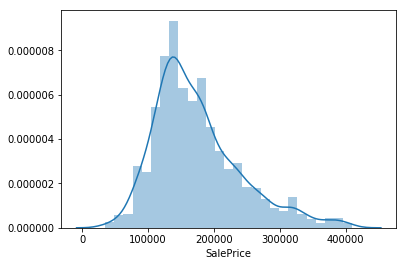

In [32]:
sns.distplot(df['SalePrice'])

*It is observed that the dependant variable is slightly positively skewed. So log transformation is applied to correct the skewness*

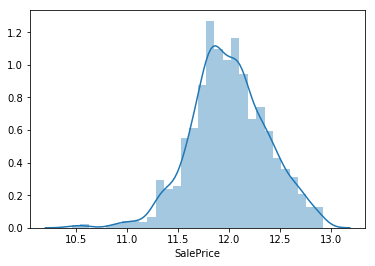

In [33]:
df['SalePrice']=np.log(df['SalePrice'])
sns.distplot(df['SalePrice'])

## Encoding Categorical Variables

#### Label Encoding

In [34]:
# Label encode ordered categorical variables
cols_label=['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
      'HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','Fence']


In [35]:
le=LabelEncoder() 
df[cols_label]= df[cols_label].apply(lambda col: le.fit_transform(col))

#### One Hot Encoding

In [36]:
col_oh=['MSZoning','LandContour', 'LotConfig', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
        'RoofStyle','Exterior1st','Exterior2nd','Foundation','Heating','Electrical','Functional','GarageType','GarageFinish',
        'PavedDrive','SaleType','SaleCondition','RoofMatl','MasVnrType']

df_dummy = pd.get_dummies(df[col_oh])

In [37]:
df_dummy.drop(['MSZoning_C (all)','LandContour_Low','LotConfig_FR3', 'Neighborhood_Blueste','Condition1_RRNe',
               'Condition2_RRAe','BldgType_2fmCon','HouseStyle_2.5Fin','RoofStyle_Shed','Exterior1st_CBlock','Exterior2nd_Other',
               'Foundation_Wood','Heating_Floor','Electrical_Mix','Functional_Sev','GarageType_2Types','PavedDrive_P', 
               'SaleType_Con','SaleCondition_AdjLand','MasVnrType_BrkCmn','RoofMatl_Metal' ],axis=1,inplace=True)

In [38]:
col_fin=df_dummy.columns.tolist()


In [39]:
df = pd.concat([df, df_dummy], axis=1)# Adding the results to the master dataframe
df.drop(col_oh,axis=1,inplace=True)# Dropping original columns


### Checking Correlation

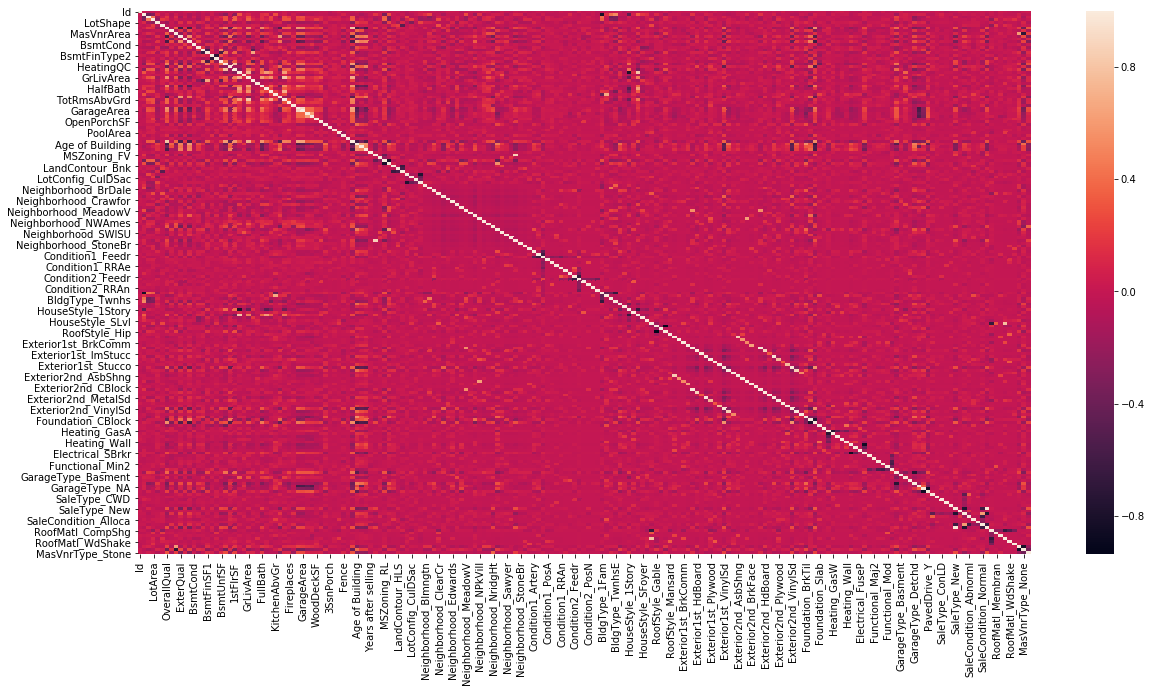

In [40]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr())
plt.show()

In [41]:
# function to eliminate redundant pairs
def redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()   # to ensure that duplicate pairs are not present
    cols = df.columns       # getting list of all solumns in dataframe  
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# function to get highly correlated pairs
def get_top_abs_correlations(df, n):     
    cor = df.corr().abs().unstack()  # getting the absolute value of all correlation coefficienrs
    labels_to_drop = redundant_pairs(df)
    cor = cor.drop(labels=labels_to_drop).sort_values(ascending=False)
    return cor[0:n]


In [42]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[df.columns[2:]], 32))

Top Absolute Correlations
SaleType_New         SaleCondition_Partial    0.985014
Exterior1st_CemntBd  Exterior2nd_CmentBd      0.981085
Exterior1st_VinylSd  Exterior2nd_VinylSd      0.976812
Exterior1st_MetalSd  Exterior2nd_MetalSd      0.972926
RoofStyle_Gable      RoofStyle_Hip            0.935038
GarageCars           GarageArea               0.884633
Exterior1st_HdBoard  Exterior2nd_HdBoard      0.883982
MSZoning_FV          Neighborhood_Somerst     0.867987
Exterior1st_Wd Sdng  Exterior2nd_Wd Sdng      0.860765
Electrical_FuseA     Electrical_SBrkr         0.855835
PavedDrive_N         PavedDrive_Y             0.854995
Exterior1st_AsbShng  Exterior2nd_AsbShng      0.847854
GrLivArea            TotRmsAbvGrd             0.823555
MasVnrType_BrkFace   MasVnrType_None          0.817799
2ndFlrSF             HouseStyle_2Story        0.811399
MSZoning_RL          MSZoning_RM              0.806946
OverallQual          SalePrice                0.806695
2ndFlrSF             HouseStyle_1Story 

In [43]:
col_dr=['SaleType_New','Exterior1st_VinylSd','Exterior1st_CemntBd','Exterior1st_MetalSd','RoofStyle_Gable',
        'Exterior1st_HdBoard','GarageCars','Exterior1st_Wd Sdng','MSZoning_FV','Electrical_FuseA',
        'PavedDrive_N','Exterior1st_AsbShng','RoofMatl_Tar&Grv' ,'TotRmsAbvGrd','TotalBsmtSF','MSZoning_RL','2ndFlrSF',
        'MasVnrType_None','2ndFlrSF','Exterior1st_Stucco','Foundation_CBlock','SaleType_WD','Exterior1st_Plywood',
        'LotConfig_Corner','Heating_GasA','GarageType_Attchd','BsmtFinType2']
df.drop(col_dr,axis=1,inplace=True)
df.shape

(1418, 171)

In [44]:
var_to_scale=[col for col in num_list if col not in col_dr]
var_to_scale.pop(0)   # Removing Id variable
len(var_to_scale)

32

In [45]:
var_to_scale.remove('SalePrice')

## Model Building

### Train Test Split

In [46]:
# Split the data into train and test
df_train,df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [47]:
scaler = StandardScaler()
df_train[var_to_scale] = scaler.fit_transform(df_train[var_to_scale])

In [48]:
y_train = df_train.pop('SalePrice')
X_train = df_train[df_train.columns[1:]] # excluding the Id column

In [49]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_Stone
1050,-0.890262,0.204291,-0.160480,0,0,0.735884,-0.515773,-0.578804,2,4,...,0,0,1,1,0,0,0,0,0,0
1459,-0.890262,0.306275,0.049224,3,0,-0.769264,0.351425,-0.578804,2,4,...,0,1,0,1,0,0,0,0,0,0
127,-0.306792,-0.713571,-1.183456,0,0,-0.769264,1.218623,-0.578804,3,2,...,0,1,0,1,0,0,0,0,0,0
695,-0.890262,-0.764563,0.909813,0,0,-0.016690,0.351425,-0.115538,3,4,...,0,1,0,1,0,0,0,0,1,0
1318,-0.890262,0.053861,1.125293,1,0,1.488458,-0.515773,0.566493,2,4,...,0,1,0,1,0,0,0,0,1,0


In [50]:
y_train.head()

1050    12.080991
1459    11.901583
127     11.373663
695     12.078239
1318    12.524526
Name: SalePrice, dtype: float64

### Ridge Regression

In [51]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022982,0.007180,0.004629,0.000687,0.0001,{'alpha': 0.0001},-0.087819,-0.088974,-0.087121,-0.086139,...,-0.087512,0.000924,26,-0.063796,-0.063938,-0.066009,-0.066293,-0.063583,-0.064724,0.001174
1,0.020952,0.004156,0.004635,0.000479,0.001,{'alpha': 0.001},-0.087780,-0.088975,-0.087038,-0.086128,...,-0.087476,0.000933,25,-0.063806,-0.063953,-0.066015,-0.066299,-0.063594,-0.064734,0.001172
2,0.008489,0.000228,0.002284,0.000072,0.01,{'alpha': 0.01},-0.087467,-0.088974,-0.086370,-0.086024,...,-0.087175,0.001032,24,-0.063900,-0.064080,-0.066142,-0.066356,-0.063692,-0.064834,0.001164
3,0.011877,0.006320,0.002366,0.000124,0.05,{'alpha': 0.05},-0.087281,-0.088888,-0.084725,-0.085547,...,-0.086504,0.001454,23,-0.064179,-0.064573,-0.066626,-0.066521,-0.063948,-0.065169,0.001164
4,0.008796,0.000323,0.002515,0.000237,0.1,{'alpha': 0.1},-0.087692,-0.088730,-0.083687,-0.084977,...,-0.086119,0.001840,22,-0.064377,-0.064852,-0.066914,-0.066640,-0.064117,-0.065380,0.001168


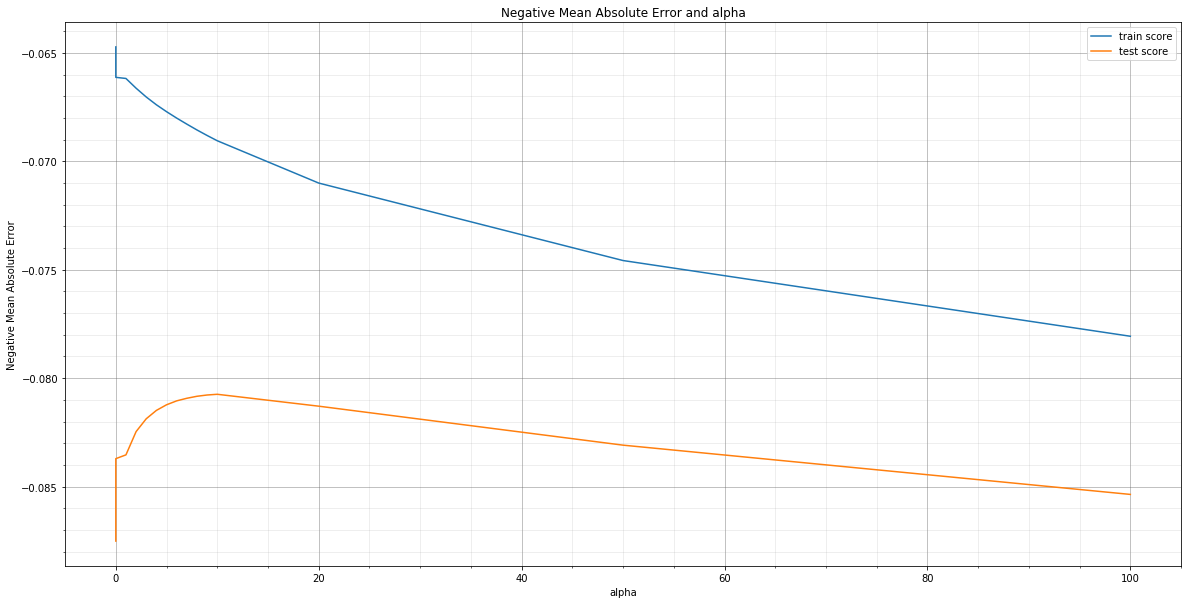

In [53]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize = (20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.grid(b=True,which='major', color='#666666', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

*Alpha value around 20 is found to be best suited for regression. This is further confirmed by the following code*

In [54]:
model_cv.best_params_

{'alpha': 10.0}

In [55]:
# Based on the above results alpha is ch0sen as 20
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [56]:
y_pred_ridge = ridge.predict(X_train)
round(r2_score(y_train, y_pred_ridge),2)

0.93

#### Identifying the important coefficients

In [57]:
ridge_coef = pd.Series(ridge.coef_, index = X_train.columns) 
print("The number of variables with non-zero coefficients found using Ridge regression is " + str(sum(ridge_coef != 0)) + " out of " +  str(len(ridge_coef)) + " variables")

The number of variables with non-zero coefficients found using Ridge regression is 165 out of 169 variables


Text(0.5, 1.0, 'Feature importance using Ridge  Model')

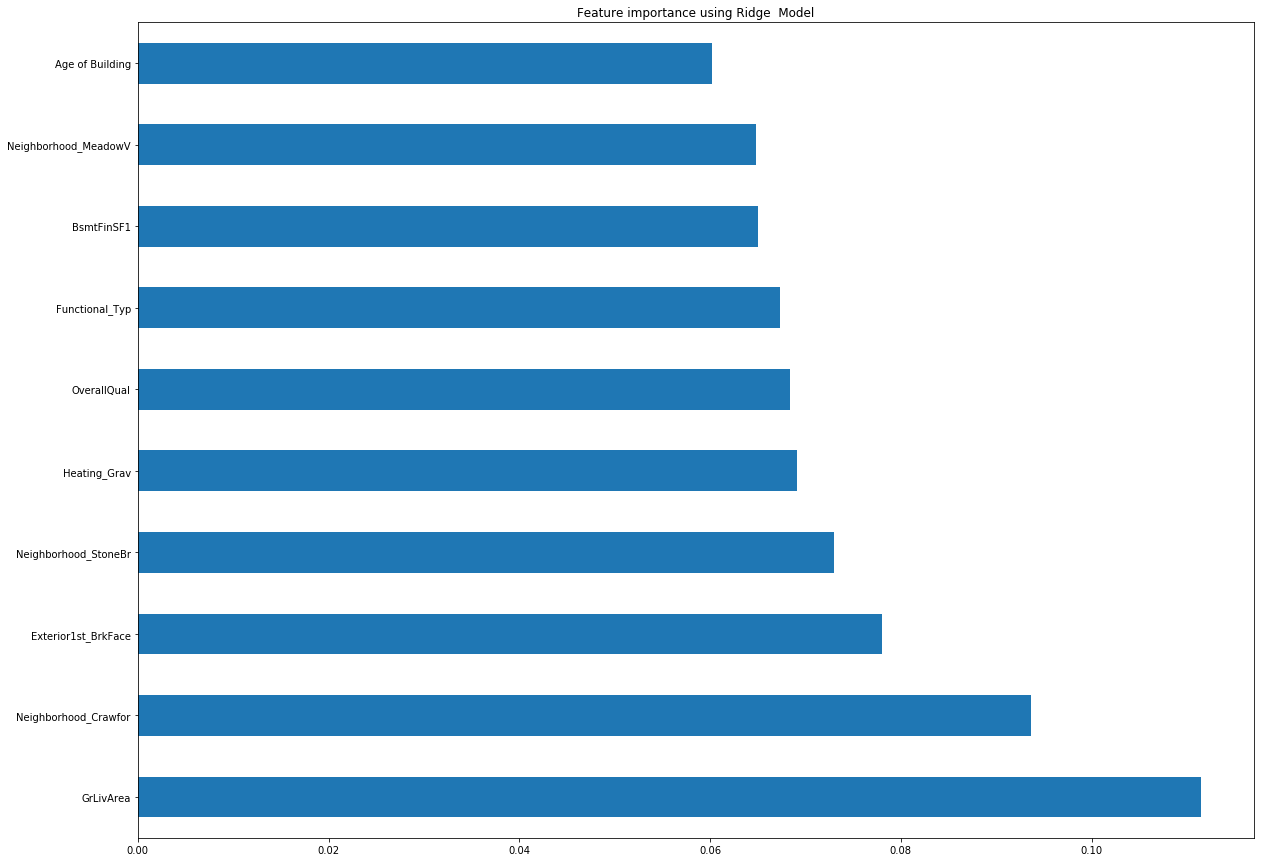

In [58]:
imp_coef_ridge = abs(ridge_coef).sort_values(ascending=False) # Sorting the coefficients
plt.figure(figsize = (20,15))
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_ridge[:10].plot(kind = "barh")   # Plotting value of coefficients for most important 10 variables
plt.title("Feature importance using Ridge  Model")

In [59]:
imp_coef_ridge[:10]  # Displaying the coefficients of first 30 variables 

GrLivArea               0.111437
Neighborhood_Crawfor    0.093666
Exterior1st_BrkFace     0.078014
Neighborhood_StoneBr    0.072959
Heating_Grav            0.069144
OverallQual             0.068399
Functional_Typ          0.067364
BsmtFinSF1              0.064971
Neighborhood_MeadowV    0.064835
Age of Building         0.060170
dtype: float64

#### Evaluating the model on Test Set

In [60]:
df_test[var_to_scale] = scaler.transform(df_test[var_to_scale])
y_test = df_test.pop('SalePrice')
X_test = df_test[df_test.columns[1:]]

In [61]:
y_test_pred_ridge = ridge.predict(X_test)
round(r2_score(y_test, y_test_pred_ridge),2)

0.9

Since the difference between the R- Squared  values for the test and train set is very small, the model built using Ridge regression performs well

### Lasso Regression

In [62]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023711,0.002623,0.002490,0.000117,0.0001,{'alpha': 0.0001},-0.086499,-0.086776,-0.078762,-0.079303,...,-0.083049,0.003432,2,-0.065405,-0.066225,-0.067740,-0.067782,-0.064952,-0.066421,0.001168
1,0.021196,0.007783,0.003775,0.000821,0.001,{'alpha': 0.001},-0.084686,-0.082303,-0.076581,-0.074620,...,-0.080725,0.004346,1,-0.071005,-0.072259,-0.073606,-0.073602,-0.071246,-0.072343,0.001112
2,0.019738,0.000531,0.004086,0.000220,0.01,{'alpha': 0.01},-0.096370,-0.091055,-0.096987,-0.085124,...,-0.092851,0.004376,3,-0.088233,-0.089674,-0.089773,-0.091536,-0.087743,-0.089392,0.001333
3,0.012685,0.005278,0.003112,0.000775,0.05,{'alpha': 0.05},-0.123339,-0.110456,-0.119161,-0.113626,...,-0.116709,0.004446,4,-0.113243,-0.115832,-0.114471,-0.116008,-0.113917,-0.114694,0.001075
4,0.008383,0.000645,0.002489,0.000344,0.1,{'alpha': 0.1},-0.162579,-0.150960,-0.158094,-0.157100,...,-0.156674,0.003849,5,-0.152112,-0.157511,-0.154982,-0.157232,-0.155175,-0.155402,0.001942


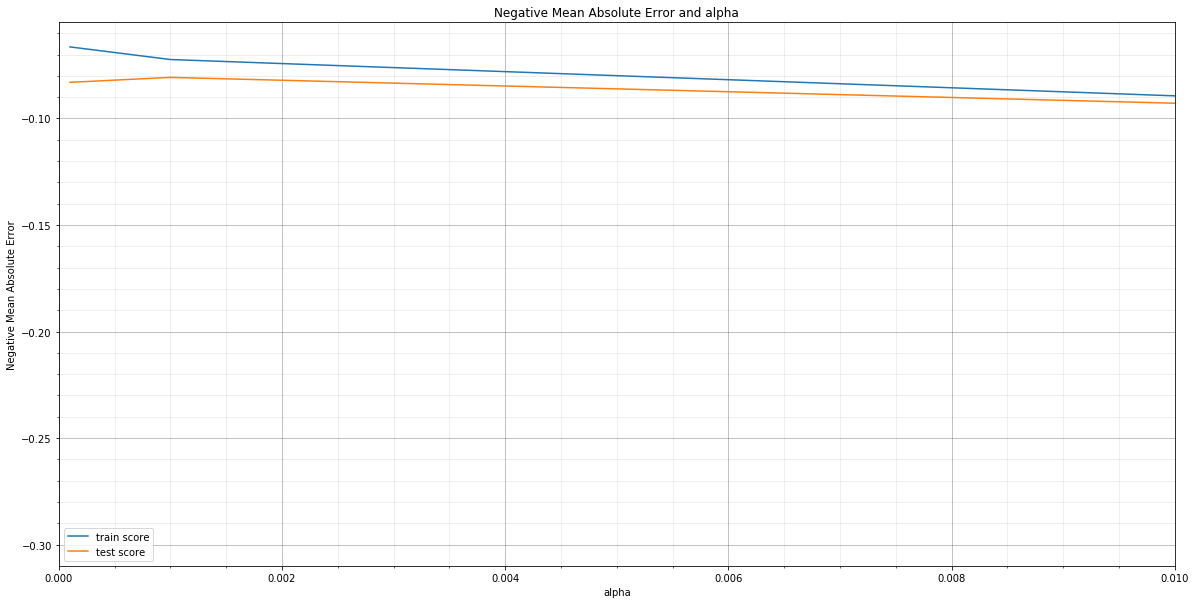

In [64]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize = (20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlim(0,.01)
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.grid(b=True,which='major', color='#666666', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower left')
plt.show()

In [65]:
model_cv.best_params_

{'alpha': 0.001}

In [66]:
lasso = Lasso(alpha=.001)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
y_pred_lasso = lasso.predict(X_train)
round(r2_score(y_train, y_pred_lasso),2)

0.92

#### Evaluating the model on Test set

In [68]:
y_test_pred_lasso = lasso.predict(X_test)
round(r2_score(y_test, y_test_pred_lasso),2)

0.9

The difference in R- squared value for both train and test data set are small and hence the Lasso model also performs better

In [69]:
lasso_coef = pd.Series(lasso.coef_, index = X_train.columns) 
print("Lasso picked " + str(sum(lasso_coef != 0)) + " variables and eliminated the other " +  str(sum(lasso_coef == 0)) + " variables")

Lasso picked 73 variables and eliminated the other 96 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

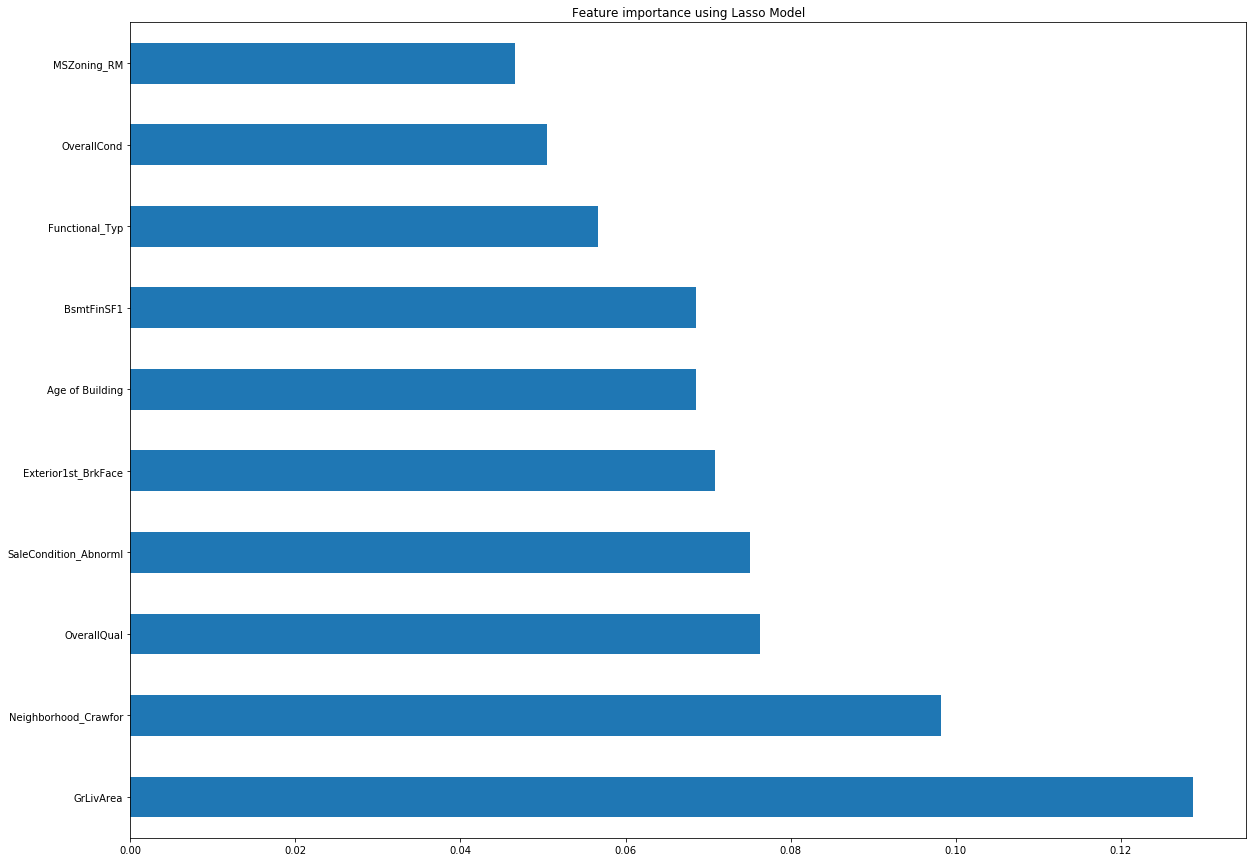

In [70]:
plt.figure(figsize = (20,15))
imp_coef_lasso = abs(lasso_coef).sort_values(ascending=False)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_lasso[:10].plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Since the R2 value of Lasso regression is almost the same as th Ridge Regression despite having a reduced number of features, lasso regression is used for predicting the values in the test data

## Prediction on Test Data using the model built using Lasso Regression

In [71]:
# Reading the test data
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [72]:
test_df.shape

(1459, 80)

In [73]:
# Filling nan values
na_fill(*col_fillna,data=test_df)

In [74]:
test_df.drop(['Alley','MiscFeature','PoolQC','Street','Utilities', 'CentralAir'],axis=1,inplace=True)
test_df.shape

(1459, 74)

In [75]:
# Since both the mean and median are almost equal, the variable lot frontage is imputed with mean
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [76]:
test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode().iloc[0],inplace=True)
test_df['Electrical'].fillna(test_df['Electrical'].mode().iloc[0],inplace=True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median(),inplace=True)

In [77]:
# change year to date
test_df['YearBuilt'] = pd.to_datetime(test_df['YearBuilt'],format='%Y').dt.year
test_df['YearRemodAdd']=pd.to_datetime(test_df['YearRemodAdd'],format='%Y').dt.year
test_df['GarageYrBlt']=pd.to_datetime(test_df['GarageYrBlt'],format='%Y',errors = 'coerce').dt.year
test_df['Selling_Time'] = pd.to_datetime(test_df['YrSold'].astype(str)  + test_df['MoSold'].astype(str),format='%Y%m').dt.year

# Derived parameters
current_year=dt.date.today().year
test_df['Age of Building']=current_year-test_df['YearBuilt']
test_df['Age of Garage']=current_year-test_df['GarageYrBlt']
test_df['Remodelled']=current_year-test_df['YearRemodAdd']
test_df['Years after selling']=current_year-test_df['Selling_Time']

#dropping original columns
test_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold','Selling_Time'],axis=1,inplace=True)

# Imputing missing values in Age of Garage column. The missing values are beacuse garage was not built at all
test_df['Age of Garage'].fillna(value=-1,inplace=True)  # impute missing value in Age of Garage with a negative value to indicate no garage

col=test_df.columns[test_df.isnull().any()].tolist()
test_df[col].isnull().sum()/len(test_df)

# Dropping rows having misisng values
test_df.shape

(1459, 73)

#### Encoding Categorical Variables

In [78]:
col=test_df.columns[test_df.isnull().any()].tolist()
test_df[col].isnull().sum()/len(test_df)
test_df[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
MSZoning        1455 non-null object
Exterior1st     1458 non-null object
Exterior2nd     1458 non-null object
BsmtFinSF1      1458 non-null float64
BsmtFinSF2      1458 non-null float64
BsmtUnfSF       1458 non-null float64
TotalBsmtSF     1458 non-null float64
BsmtFullBath    1457 non-null float64
BsmtHalfBath    1457 non-null float64
KitchenQual     1458 non-null object
Functional      1457 non-null object
GarageCars      1458 non-null float64
GarageArea      1458 non-null float64
SaleType        1458 non-null object
dtypes: float64(8), object(6)
memory usage: 159.7+ KB


In [79]:
cat_col = test_df[col].select_dtypes('object').columns.tolist()
num_col=test_df[col].select_dtypes(exclude=['object']).columns.tolist()
#imputing missing values in other columns
test_df[cat_col]=test_df[cat_col].fillna(test_df.mode().iloc[0])


In [80]:
test_df[num_col]=test_df[num_col].fillna(test_df.median())

In [81]:
#### Label Encoding

# Label encode ordered categorical variables
cols_label=['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
      'HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','Fence']

le=LabelEncoder() 
test_df[cols_label]= test_df[cols_label].apply(lambda col: le.fit_transform(col))

#### One Hot Encoding

col_oh=['MSZoning','LandContour', 'LotConfig', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
        'RoofStyle','Exterior1st','Exterior2nd','Foundation','Heating','Electrical','Functional','GarageType','GarageFinish',
        'PavedDrive','SaleType','SaleCondition','RoofMatl','MasVnrType']
test_df_dummy = pd.get_dummies(test_df[col_oh])

In [82]:
col_to_drop =set(test_df_dummy.columns) -set(col_fin)
col_to_drop

{'BldgType_2fmCon',
 'Condition1_RRNe',
 'Exterior1st_CBlock',
 'Foundation_Wood',
 'Functional_Sev',
 'GarageType_2Types',
 'LandContour_Low',
 'LotConfig_FR3',
 'MSZoning_C (all)',
 'MasVnrType_BrkCmn',
 'Neighborhood_Blueste',
 'PavedDrive_P',
 'RoofStyle_Shed',
 'SaleCondition_AdjLand',
 'SaleType_Con'}

In [83]:
test_df_dummy.drop(col_to_drop,axis=1,inplace=True)
test_df_dummy.shape

(1459, 139)

In [84]:
test_df = pd.concat([test_df, test_df_dummy], axis=1)# Adding the results to the master dataframe
test_df.drop(col_oh,axis=1,inplace=True)# Dropping original columns

test_df.shape

(1459, 189)

It is observed that the number of dummy variables in test data is not the same as train data which may affect the prediction and hence all the missing columns are added

In [85]:
missing_cols = set(df.columns ) - set( test_df.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_df[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_df = test_df[df.columns]

In [86]:
# Dropping the Sale price column that is added manually in the previous stage
test_df.drop('SalePrice',axis=1,inplace=True) 
test_df.shape

(1459, 170)

### Scaling

In [87]:
test_df[var_to_scale] = scaler.transform(test_df[var_to_scale])

In [88]:
X = test_df[test_df.columns[1:]] # excluding the Id column
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_Stone
0,-0.890262,0.561237,0.423538,3,0,-0.769264,0.351425,-0.578804,3,4,...,0,1,0,1,0,0,0,0,0,0
1,-0.890262,0.612229,1.011111,0,0,-0.016690,0.351425,0.116095,3,4,...,0,1,0,1,0,0,0,0,1,0
2,0.043290,0.255283,0.914033,0,0,-0.769264,-0.515773,-0.578804,3,4,...,0,1,0,1,0,0,0,0,0,0
3,0.043290,0.459252,0.058332,0,0,-0.016690,0.351425,-0.450119,3,4,...,0,1,0,1,0,0,0,0,1,0
4,1.443618,-1.325478,-1.046393,0,0,1.488458,-0.515773,-0.578804,2,4,...,0,1,0,1,0,0,0,0,0,0


In [89]:
# prediction
y_pred=lasso.predict(X)
y_pred

array([11.68033609, 11.93621738, 12.08733735, ..., 12.02289865,
       11.6755356 , 12.31688403])

In [90]:
y_pred= np.exp(y_pred)  # Converting the normalised data to original scale

In [91]:
sub_df=pd.DataFrame({'Id':test_df.Id,'SalePrice':y_pred})
sub_df.head()

,Id,SalePrice
0,1461,118223.962457
1,1462,152697.998202
2,1463,177608.568470
3,1464,196933.511445
4,1465,190743.617046


In [92]:
sub_df.to_csv('submission.csv', index=False)